In [207]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
import cv2
from sklearn.model_selection import train_test_split

In [208]:
for folder in os.listdir('Training'):
    print(folder)
        

glioma_tumor
meningioma_tumor
no_tumor
pituitary_tumor


In [209]:
label_code = {
    'glioma_tumor': 0,
    'meningioma_tumor': 1,
    'no_tumor': 2,
    'pituitary_tumor': 3
}

In [210]:
def preprop(data):
    images = []
    labels = []
    for folder in os.listdir(data): 
        for img in os.listdir(os.path.join(data, folder)):
            images.append(cv2.resize(cv2.imread(os.path.join(data, folder, img),cv2.IMREAD_GRAYSCALE), (512,512))/255.0)
            labels.append(folder)
            
    labels = [label_code.get(item,item) for item in labels]
    return np.array(images),np.array(labels)

In [211]:
X, y = preprop('Training')

In [212]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.1,random_state=42)

In [213]:
X_train.shape

(2583, 512, 512)

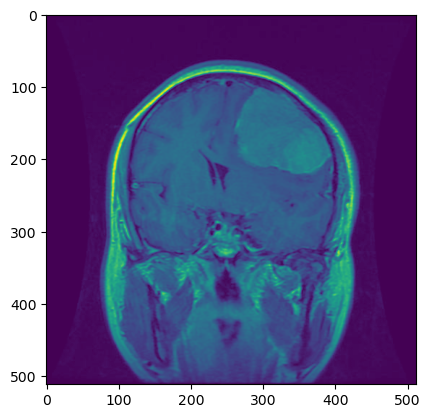

In [214]:
plt.imshow(X_train[0])

In [253]:
model = Sequential()

model.add(Conv2D(32,(3,3),1, activation = 'relu', input_shape = (512,512,1)))
model.add(MaxPooling2D())

# model.add(Conv2D(32,(3,3),1, activation = 'relu'))
# model.add(MaxPooling2D())

model.add(Conv2D(8,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [254]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [255]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 255, 255, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 253, 253, 8)       2312      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 126, 126, 8)       0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 127008)            0         
                                                                 
 dense_14 (Dense)            (None, 8)                

In [256]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [257]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs = 10,shuffle=True,callbacks=[tensorboard_callback])

Epoch 1/10
81/81 [==============================] - 61s 711ms/step - loss: 1.2030 - accuracy: 0.4402 - val_loss: 0.9184 - val_accuracy: 0.5645
Epoch 2/10
81/81 [==============================] - 53s 650ms/step - loss: 0.7080 - accuracy: 0.6907 - val_loss: 0.6446 - val_accuracy: 0.7491
Epoch 3/10
81/81 [==============================] - 52s 642ms/step - loss: 0.3819 - accuracy: 0.8517 - val_loss: 0.6264 - val_accuracy: 0.7909
Epoch 4/10
81/81 [==============================] - 53s 655ms/step - loss: 0.2081 - accuracy: 0.9261 - val_loss: 0.4499 - val_accuracy: 0.8293
Epoch 5/10
81/81 [==============================] - 430s 5s/step - loss: 0.0880 - accuracy: 0.9729 - val_loss: 0.5294 - val_accuracy: 0.8188
Epoch 6/10
81/81 [==============================] - 130s 2s/step - loss: 0.0506 - accuracy: 0.9853 - val_loss: 0.5224 - val_accuracy: 0.8606
Epoch 7/10
81/81 [==============================] - 64s 790ms/step - loss: 0.0225 - accuracy: 0.9973 - val_loss: 0.5767 - val_accuracy: 0.8362
Epo

In [258]:
hist.history

{'loss': [1.2030174732208252,
  0.7080006003379822,
  0.3818964958190918,
  0.20808538794517517,
  0.08801683038473129,
  0.05058370530605316,
  0.02251535840332508,
  0.011749707162380219,
  0.005636611487716436,
  0.0029517284128814936],
 'accuracy': [0.4401858448982239,
  0.6906697750091553,
  0.851722776889801,
  0.9260549545288086,
  0.9728997349739075,
  0.9852884411811829,
  0.9972899556159973,
  0.9984514117240906,
  1.0,
  1.0],
 'val_loss': [0.9184419512748718,
  0.6446308493614197,
  0.6263794302940369,
  0.44985297322273254,
  0.5294197201728821,
  0.5224128365516663,
  0.5766522288322449,
  0.6864486932754517,
  0.6409003138542175,
  0.6534712910652161],
 'val_accuracy': [0.5644599199295044,
  0.7491289377212524,
  0.7909407615661621,
  0.8292682766914368,
  0.8188153505325317,
  0.8606271743774414,
  0.8362369537353516,
  0.8397212624549866,
  0.8501741886138916,
  0.8571428656578064]}

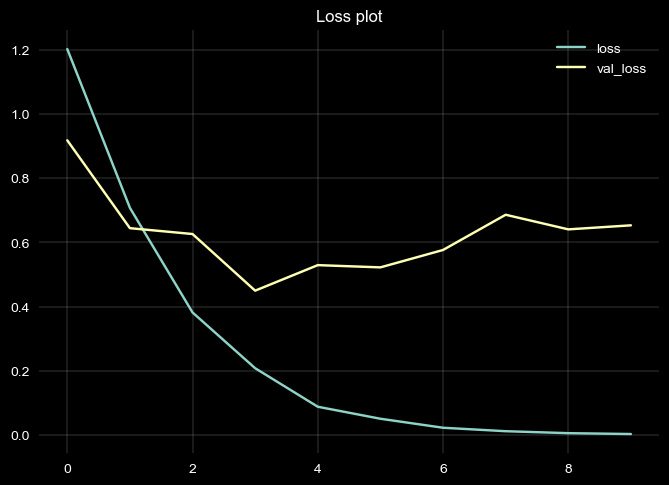

In [286]:
plt.style.use('dark_background')
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.grid(color='gray',linewidth=0.3)
plt.title('Loss plot')
plt.legend()
plt.show()

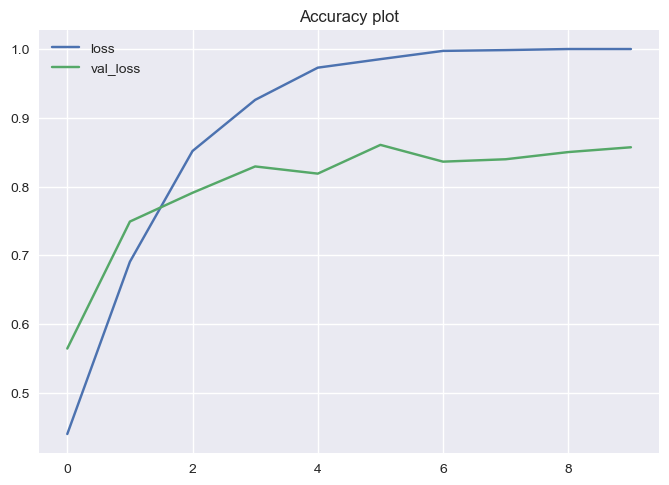

In [279]:
plt.style.use('seaborn-v0_8')
plt.plot(hist.history['accuracy'],label='loss')
plt.plot(hist.history['val_accuracy'],label='val_loss')
plt.title('Accuracy plot')
plt.legend()
plt.show()

In [261]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

test_X, test_y = preprop('Testing')

yhat = model.predict(test_X)


13/13 [==============================] - 4s 229ms/step


In [262]:
yhat_f = [list(yhat[x].round()).index(max(list(yhat[x].round()))) for x in range(len(yhat))]

In [263]:
pre.update_state(test_y, yhat_f)
re.update_state(test_y, yhat_f)

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,yhat_f)

0.7106598984771574

In [265]:
print(pre.result().numpy(),re.result().numpy())

0.7837838 0.9863946


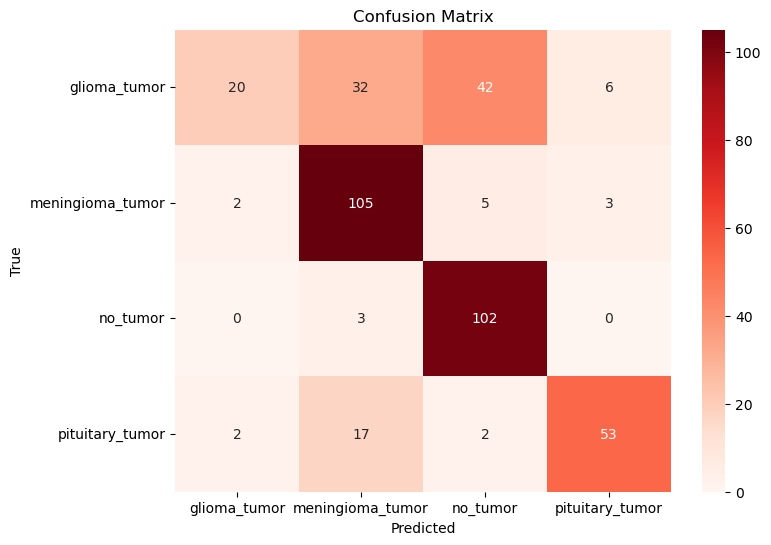

In [266]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Assuming y_true and y_pred are your true and predicted labels
# y_true and y_pred should be 1D arrays of integers representing class indices

# Generate confusion matrix
cm = confusion_matrix(test_y, yhat_f)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [267]:
model.save('brain_tumor_model.h5')

c:\Users\SainathDevulapalli\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [268]:
test_X.shape

(394, 512, 512)

In [269]:
# Model load test
m = load_model('brain_tumor_model.h5')
test_pred = m.predict(test_X[20].reshape(1,512,512)).round()
test_pred = list(test_pred[0]).index(max(test_pred[0]))

m.predict(test_X[20].reshape(1,512,512)).round()

1/1 [==============================] - 0s 82ms/step


array([[0., 1., 0., 0.]], dtype=float32)

1/1 [==============================] - 0s 209ms/step


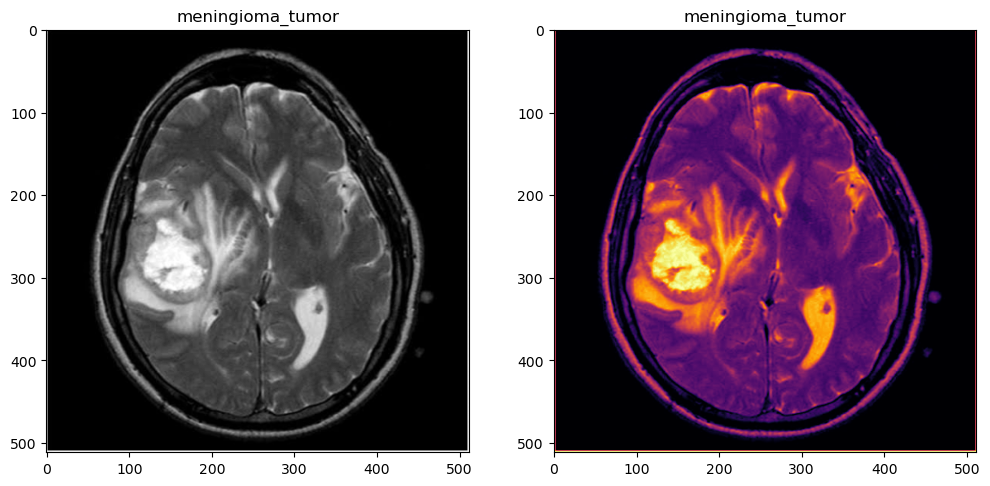

In [270]:
# Model Load and sample prediction
# Tumor

m = load_model('brain_tumor_model.h5')
test_pred = m.predict(test_X[20].reshape(1,512,512)).round()
test_pred = list(test_pred[0]).index(max(test_pred[0]))

out = dict(map(reversed, label_code.items())).get(test_pred,test_pred)

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(test_X[20],cmap='gray')
plt.title(out)

plt.subplot(1, 2, 2)
plt.imshow(test_X[20], cmap='inferno')
plt.title(out)

plt.show()

1/1 [==============================] - 0s 76ms/step


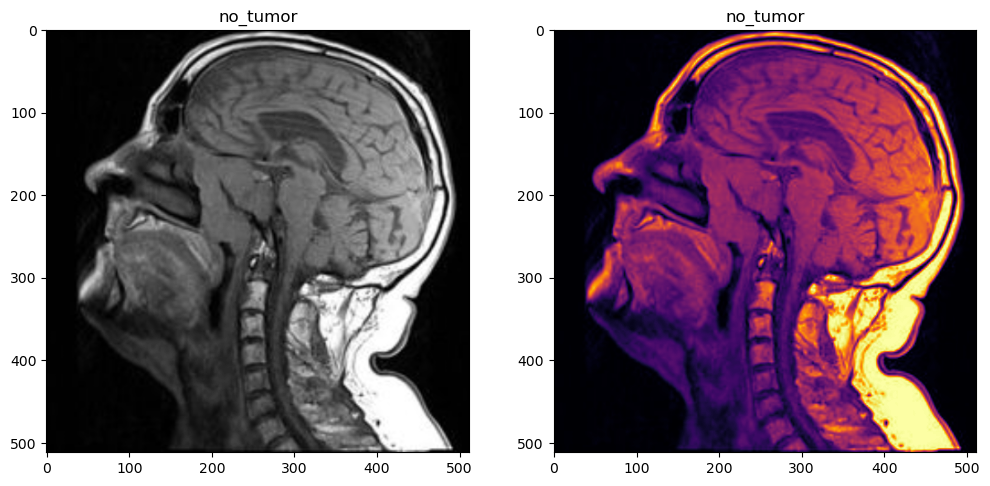

In [271]:
# No Tumor 

test_pred = m.predict(test_X[300].reshape(1,512,512)).round()
test_pred = list(test_pred[0]).index(max(test_pred[0]))

out = dict(map(reversed, label_code.items())).get(test_pred,test_pred)

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(test_X[300],cmap='gray')
plt.title(out)

plt.subplot(1, 2, 2)
plt.imshow(test_X[300], cmap='inferno')
plt.title(out)

plt.show()